# Supervised Learning - Classification Model

# Heart Disease Prediction 

- Used Models:
    - Logistic Regression
    - Naive Bayes
    - SVM (kernels: Polynomial, Linear, RBF)
    - KNN
    - Decision Tree
    - Decision Tree with Entropy
    - Random Forest
    - Cross Validation for each Model

In [135]:
#Importing all the necessary libraries

import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.model_selection import cross_val_score

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Exploratory Data Analysis

In [136]:
heart = pd.read_csv('heart.csv')
df = heart.copy()
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [138]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Checking Imbalance

1    165
0    138
Name: target, dtype: int64


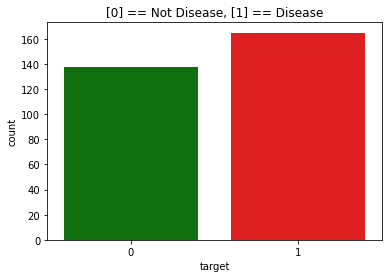

In [139]:
print(df.target.value_counts())

sns.countplot(df.iloc[:,-1], palette=['green', 'red'])
plt.title("[0] == Not Disease, [1] == Disease");

<AxesSubplot:>

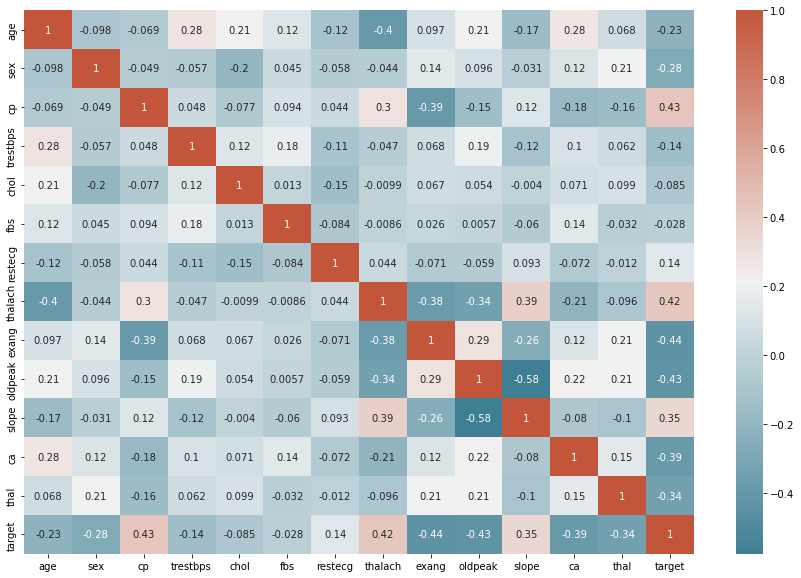

In [140]:
plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

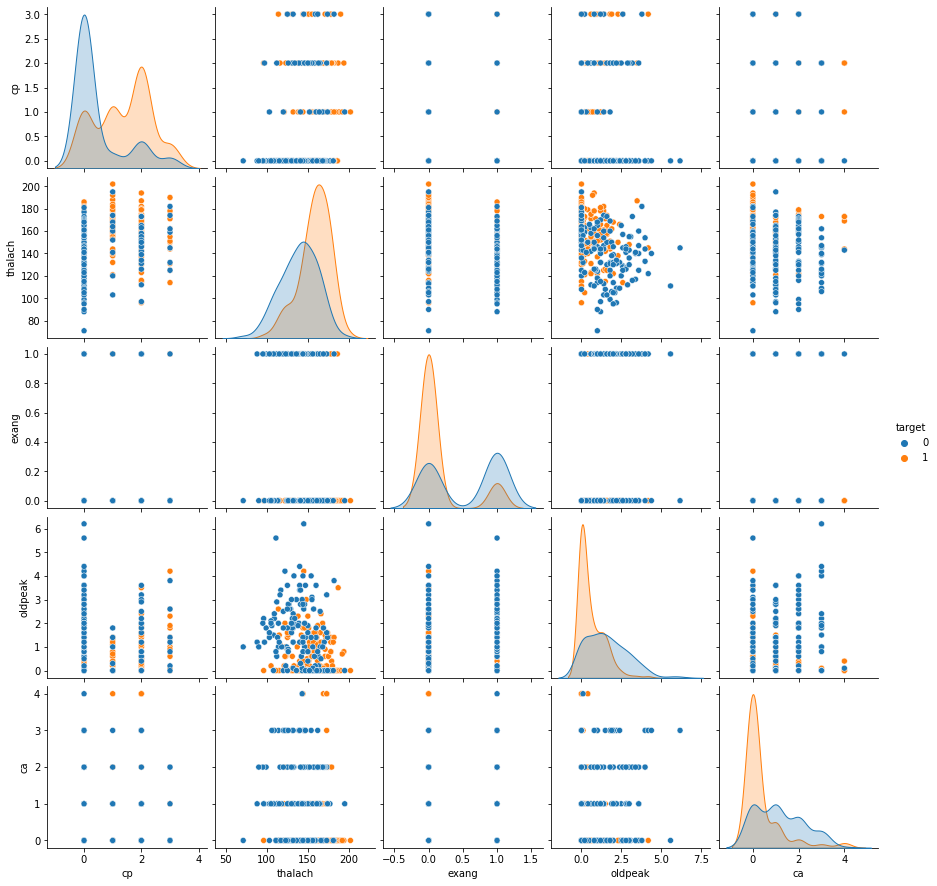

In [141]:
subData = df[['cp', 'thalach', 'exang', 'oldpeak', 'ca', 'target']]
sns.pairplot(subData, hue = 'target')

In [142]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [143]:
x = StandardScaler().fit_transform(x)

In [144]:
x

array([[ 0.9521966 ,  0.68100522,  1.97312292, ..., -2.27457861,
        -0.71442887, -2.14887271],
       [-1.91531289,  0.68100522,  1.00257707, ..., -2.27457861,
        -0.71442887, -0.51292188],
       [-1.47415758, -1.46841752,  0.03203122, ...,  0.97635214,
        -0.71442887, -0.51292188],
       ...,
       [ 1.50364073,  0.68100522, -0.93851463, ..., -0.64911323,
         1.24459328,  1.12302895],
       [ 0.29046364,  0.68100522, -0.93851463, ..., -0.64911323,
         0.26508221,  1.12302895],
       [ 0.29046364, -1.46841752,  0.03203122, ..., -0.64911323,
         0.26508221, -0.51292188]])

In [145]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=101)

## Modelling

### Logistic Regression

In [146]:
model = LogisticRegression(max_iter = 100000)
model.fit(X_train, y_train) #train the model
y_pred = model.predict(X_test)

In [147]:
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison.head()

,Actual,Predicted
221,0,0
8,1,1
89,1,1
154,1,1
201,0,0


#### Evaluation of Logistic Regression

In [148]:
print(confusion_matrix(y_test, y_pred))

[[23  8]
 [ 2 28]]


In [149]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.74      0.82        31
           1       0.78      0.93      0.85        30

    accuracy                           0.84        61
   macro avg       0.85      0.84      0.83        61
weighted avg       0.85      0.84      0.83        61



In [150]:
roc_auc_score(y_test, y_pred)

0.8376344086021505

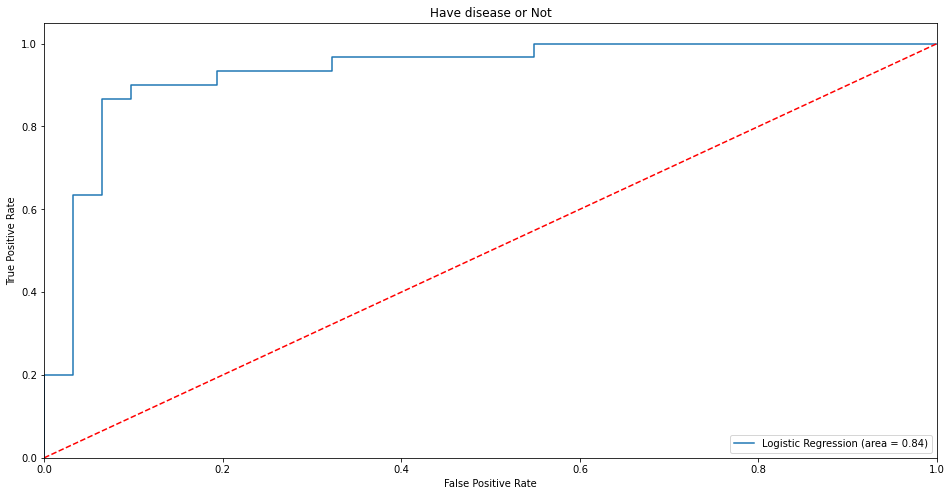

In [151]:
logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure(figsize=(16,8))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Have disease or Not')
plt.legend(loc="lower right")
plt.show()

#### Cross Validation for Logistic Regression Model

In [152]:
accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)

print('Mean accuracy CV:',accuracies.mean())
print('Standard deviation of CV:',accuracies.std())

Mean accuracy CV: 0.8140000000000001
Standard deviation of CV: 0.08790841193474541


### Naive Bayes

In [153]:
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [154]:
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison.head()

,Actual,Predicted
221,0,0
8,1,1
89,1,1
154,1,1
201,0,0


#### Evaluation of Naive Bayes

In [155]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix for Naive Bayes:''\n', cm)

Confusion Matrix for Naive Bayes:
 [[25  6]
 [ 3 27]]


In [156]:
cr = classification_report(y_test, y_pred)
print('Classification Report for Naive Bayes:''\n''\n', cr)

Classification Report for Naive Bayes:

               precision    recall  f1-score   support

           0       0.89      0.81      0.85        31
           1       0.82      0.90      0.86        30

    accuracy                           0.85        61
   macro avg       0.86      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61



In [157]:
auc = roc_auc_score(y_test, y_pred)
print('Auc Score for Naive Bayes:', auc)

Auc Score for Naive Bayes: 0.8532258064516127


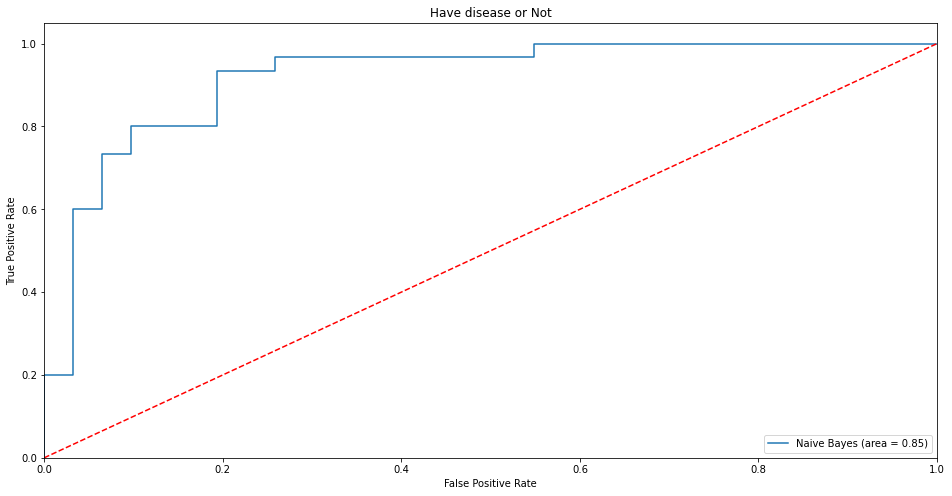

In [158]:
NB_roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure(figsize=(16,8))
plt.plot(fpr, tpr, label='Naive Bayes (area = %0.2f)' % NB_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Have disease or Not')
plt.legend(loc="lower right")
plt.show()

#### Cross Validation for Naive Bayes Model

In [159]:
accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)

print('Mean accuracy CV:',accuracies.mean())
print('Standard deviation of CV:',accuracies.std())

Mean accuracy CV: 0.8225
Standard deviation of CV: 0.055036603981148555


### SVM

#### SVM Kernel: Linear

In [160]:
model = svm.SVC(kernel = 'linear', probability=True)
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [161]:
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison.head()

,Actual,Predicted
221,0,0
8,1,1
89,1,1
154,1,1
201,0,0


#### Evaluation of SVM Model with Linear Kernel

In [162]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix for SVM:''\n', cm)

Confusion Matrix for SVM:
 [[24  7]
 [ 2 28]]


In [163]:
cr = classification_report(y_test, y_pred)
print("Classification Report for SVM:""\n", cr)

Classification Report for SVM:
               precision    recall  f1-score   support

           0       0.92      0.77      0.84        31
           1       0.80      0.93      0.86        30

    accuracy                           0.85        61
   macro avg       0.86      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61



In [164]:
auc = roc_auc_score(y_test, y_pred)
print('Auc Score for svm:', auc)

Auc Score for svm: 0.853763440860215


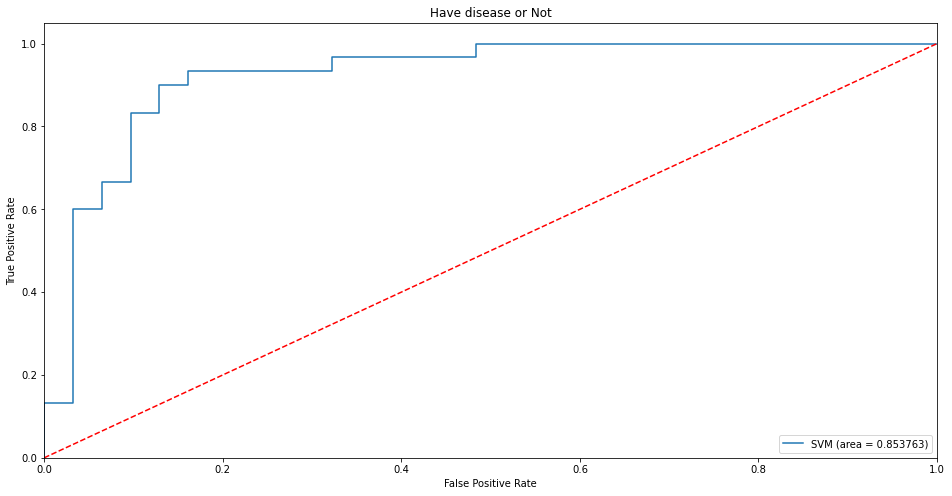

In [165]:
SVM_roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure(figsize=(16,8))
plt.plot(fpr, tpr, label='SVM (area = %02f)' % SVM_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Have disease or Not')
plt.legend(loc="lower right")
plt.show()

#### Cross Validation for SVM Model with Linear Kernel

In [166]:
accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)

print('Mean accuracy CV:',accuracies.mean())
print('Standard deviation of CV:',accuracies.std())

Mean accuracy CV: 0.8305
Standard deviation of CV: 0.07076977540667422


#### SVM Kernel: Polynomial

In [174]:
model = svm.SVC(kernel = 'poly', degree=2, probability=True)
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [175]:
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison.head()

,Actual,Predicted
221,0,0
8,1,1
89,1,1
154,1,1
201,0,0


#### Evaluation of SVM Model with Polynomial Kernel

In [176]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix for SVM:''\n', cm)

Confusion Matrix for SVM:
 [[14 17]
 [ 1 29]]


In [177]:
cr = classification_report(y_test, y_pred)
print("Classification Report for SVM:""\n", cr)

Classification Report for SVM:
               precision    recall  f1-score   support

           0       0.93      0.45      0.61        31
           1       0.63      0.97      0.76        30

    accuracy                           0.70        61
   macro avg       0.78      0.71      0.69        61
weighted avg       0.78      0.70      0.68        61



In [178]:
auc = roc_auc_score(y_test, y_pred)
print('Auc Score for svm:', auc)

Auc Score for svm: 0.7091397849462366


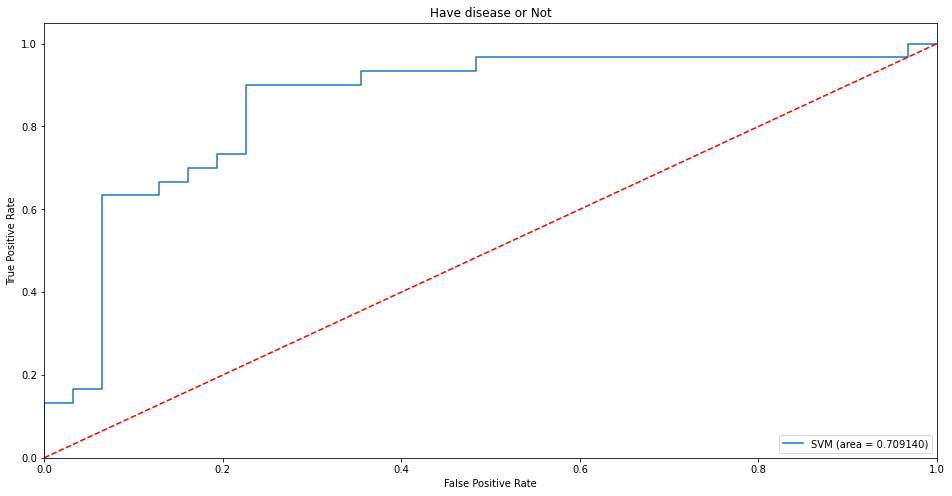

In [179]:
SVM_roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure(figsize=(16,8))
plt.plot(fpr, tpr, label='SVM (area = %02f)' % SVM_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Have disease or Not')
plt.legend(loc="lower right")
plt.show()

#### Cross Validation for SVM Model with Polynomial Kernel

In [180]:
accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)

print('Mean accuracy CV:',accuracies.mean())
print('Standard deviation of CV:',accuracies.std())

Mean accuracy CV: 0.6736666666666666
Standard deviation of CV: 0.05625734519943941


#### SVM Kernel: Radial Basis Function

In [181]:
model = svm.SVC(kernel = 'rbf', C=1, gamma=0.1, probability=True)
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [182]:
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison.head()

,Actual,Predicted
221,0,0
8,1,1
89,1,1
154,1,1
201,0,0


#### Evaluation of SVM Model with Radial Basis Function Kernel

In [183]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix for SVM:''\n', cm)

Confusion Matrix for SVM:
 [[24  7]
 [ 2 28]]


In [184]:
cr = classification_report(y_test, y_pred)
print("Classification Report for SVM:""\n", cr)

Classification Report for SVM:
               precision    recall  f1-score   support

           0       0.92      0.77      0.84        31
           1       0.80      0.93      0.86        30

    accuracy                           0.85        61
   macro avg       0.86      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61



In [185]:
auc = roc_auc_score(y_test, y_pred)
print('Auc Score for svm:', auc)

Auc Score for svm: 0.853763440860215


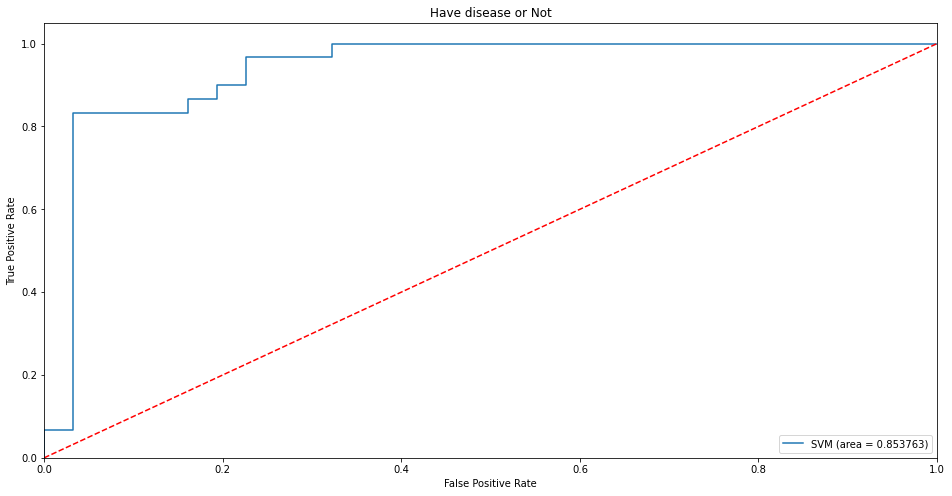

In [186]:
SVM_roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure(figsize=(16,8))
plt.plot(fpr, tpr, label='SVM (area = %02f)' % SVM_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Have disease or Not')
plt.legend(loc="lower right")
plt.show()

#### Cross Validation for SVM Model with Radial Basis Function Kernel

In [187]:
accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)

print('Mean accuracy CV:',accuracies.mean())
print('Standard deviation of CV:',accuracies.std())

Mean accuracy CV: 0.7938333333333334
Standard deviation of CV: 0.06996447511257249


### Decision Tree

In [188]:
model = DecisionTreeClassifier()
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [189]:
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison.head()

,Actual,Predicted
221,0,0
8,1,1
89,1,1
154,1,1
201,0,0


#### Evaluation of Decision Tree Classification 

In [190]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix for Decision Tree:''\n', cm)

Confusion Matrix for Decision Tree:
 [[23  8]
 [ 3 27]]


In [191]:
cr = classification_report(y_test, y_pred)
print("Classification Report for Decision Tree:""\n""\n", cr)

Classification Report for Decision Tree:

               precision    recall  f1-score   support

           0       0.88      0.74      0.81        31
           1       0.77      0.90      0.83        30

    accuracy                           0.82        61
   macro avg       0.83      0.82      0.82        61
weighted avg       0.83      0.82      0.82        61



In [192]:
auc = roc_auc_score(y_test, y_pred)
print('Auc Score for Decision Tree:', auc)

Auc Score for Decision Tree: 0.8209677419354838


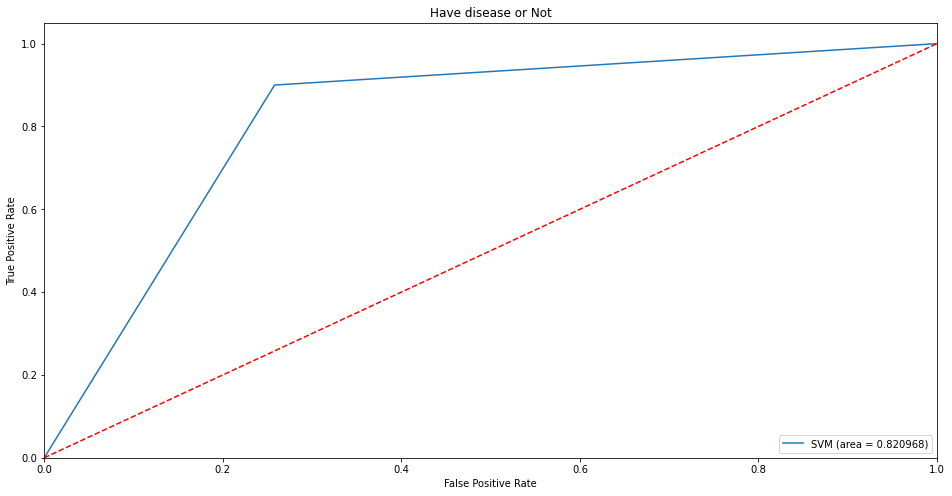

In [193]:
DT_roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure(figsize = (16, 8))
plt.plot(fpr, tpr, label='SVM (area = %02f)' % DT_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Have disease or Not')
plt.legend(loc="lower right")
plt.show()

#### Cross Validation for Decision Tree Classifier

In [194]:
accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)

print('Mean accuracy CV:',accuracies.mean())
print('Standard deviation of CV:',accuracies.std())

Mean accuracy CV: 0.7735
Standard deviation of CV: 0.07550367908622438


### Decision Tree Classifier with entropy

In [195]:
model = DecisionTreeClassifier(criterion="entropy")
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [196]:
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison.head()

,Actual,Predicted
221,0,1
8,1,1
89,1,1
154,1,1
201,0,0


#### Evaluation of Decision Tree Classification with entropy

In [197]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix for Decision Tree:''\n', cm)

Confusion Matrix for Decision Tree:
 [[22  9]
 [ 2 28]]


In [198]:
cr = classification_report(y_test, y_pred)
print("Classification Report for Decision Tree:""\n""\n", cr)

Classification Report for Decision Tree:

               precision    recall  f1-score   support

           0       0.92      0.71      0.80        31
           1       0.76      0.93      0.84        30

    accuracy                           0.82        61
   macro avg       0.84      0.82      0.82        61
weighted avg       0.84      0.82      0.82        61



In [199]:
auc = roc_auc_score(y_test, y_pred)
print('Auc Score for Decision Tree:', auc)

Auc Score for Decision Tree: 0.821505376344086


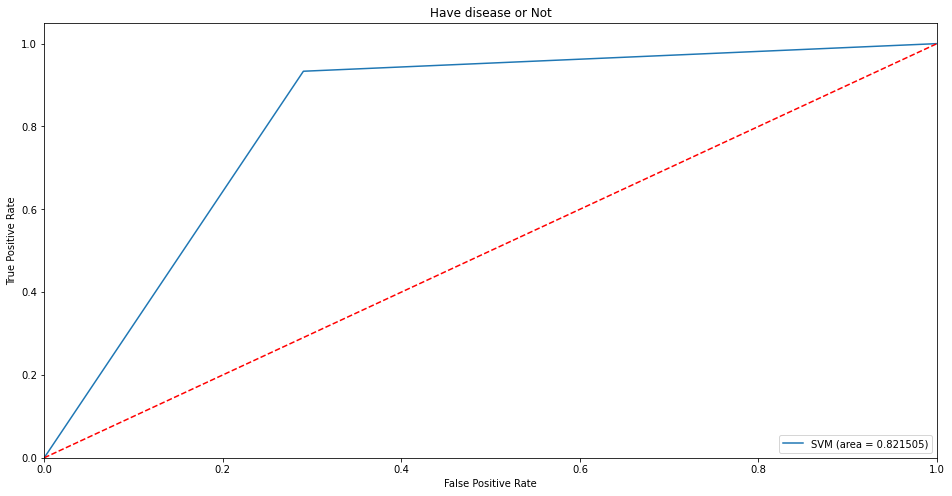

In [200]:
DT_roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure(figsize = (16, 8))
plt.plot(fpr, tpr, label='SVM (area = %02f)' % DT_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Have disease or Not')
plt.legend(loc="lower right")
plt.show()

#### Cross Validation for Decision Tree Classifier with entropy

In [201]:
accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)

print('Mean accuracy CV:',accuracies.mean())
print('Standard deviation of CV:',accuracies.std())

Mean accuracy CV: 0.7648333333333333
Standard deviation of CV: 0.0797267904227375


### Random Forest

In [202]:
model = RandomForestClassifier(n_estimators = 10, random_state = None)
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [203]:
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison.head()

,Actual,Predicted
221,0,0
8,1,1
89,1,1
154,1,1
201,0,0


#### Evaluation of Random Forest

In [204]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix for SVM:''\n', cm)

Confusion Matrix for SVM:
 [[25  6]
 [ 8 22]]


In [205]:
cr = classification_report(y_test, y_pred)
print("Classification Report for SVM:""\n""\n", cr)

Classification Report for SVM:

               precision    recall  f1-score   support

           0       0.76      0.81      0.78        31
           1       0.79      0.73      0.76        30

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61



In [206]:
auc = roc_auc_score(y_test, y_pred)
print('Auc Score for svm:', auc)

Auc Score for svm: 0.7698924731182795


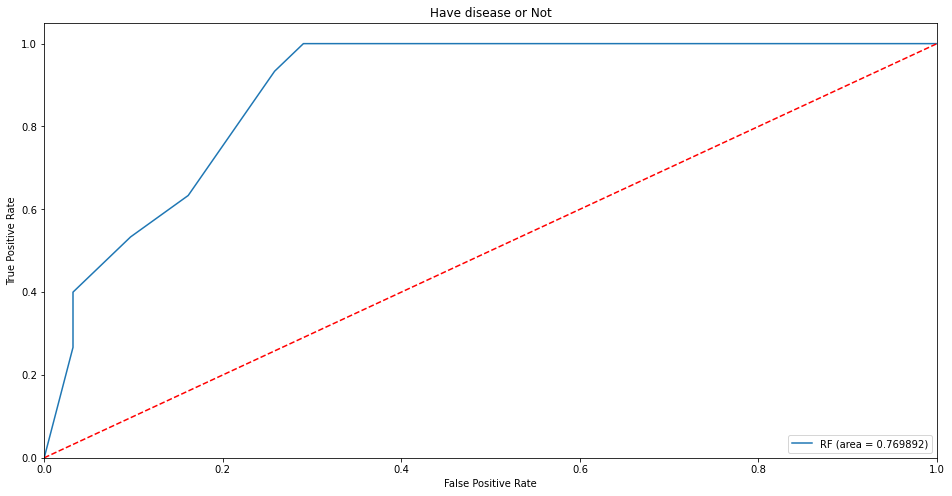

In [207]:
RF_roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure(figsize = (16, 8))
plt.plot(fpr, tpr, label = 'RF (area = %02f)' % RF_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Have disease or Not')
plt.legend(loc="lower right")
plt.show()

#### Cross Validation for Random Forest

In [208]:
accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)

print('Mean accuracy CV:',accuracies.mean())
print('Standard deviation of CV:',accuracies.std())

Mean accuracy CV: 0.8098333333333334
Standard deviation of CV: 0.06477932626317684


### KNN

In [209]:
model = KNeighborsClassifier(n_neighbors=5)
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [210]:
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison.head()

,Actual,Predicted
221,0,0
8,1,1
89,1,1
154,1,1
201,0,0


#### Evaluation of KNN

In [211]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix ''\n', cm)

Confusion matrix 
 [[26  5]
 [ 3 27]]


In [212]:
cr = classification_report(y_test, y_pred)
print("Classification Report for KNN:""\n""\n", cr)

Classification Report for KNN:

               precision    recall  f1-score   support

           0       0.90      0.84      0.87        31
           1       0.84      0.90      0.87        30

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [213]:
auc = roc_auc_score(y_test, y_pred)
print('Auc Score for KNN:', auc)

Auc Score for KNN: 0.8693548387096774


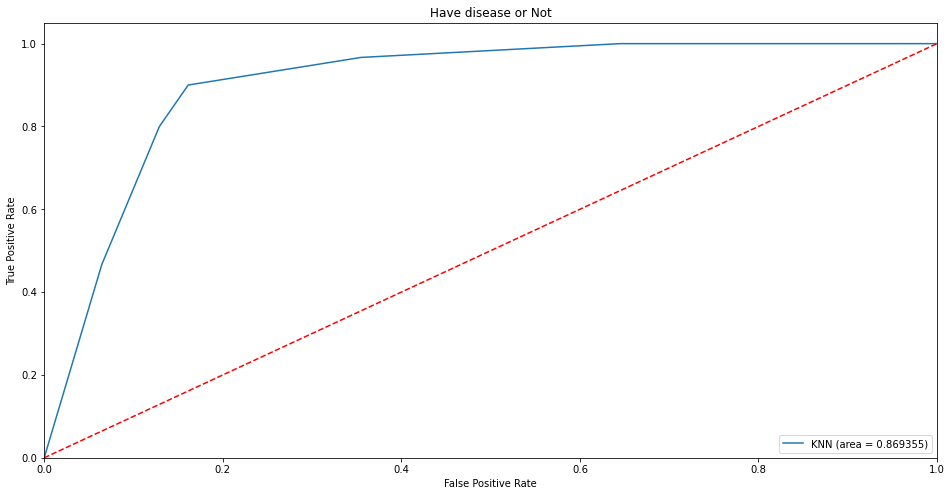

In [214]:
KNN_roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure(figsize = (16, 8))
plt.plot(fpr, tpr, label = 'KNN (area = %02f)' % KNN_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Have disease or Not')
plt.legend(loc="lower right")
plt.show()

#### Cross Validation for KNN

In [215]:
accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)

print('Mean accuracy CV:',accuracies.mean())
print('Standard deviation of CV:',accuracies.std())

Mean accuracy CV: 0.8141666666666667
Standard deviation of CV: 0.06914256608229438
